In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import numpy as np 
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [34]:
def make_plots(d, k, save = False):
    #Load threshold data
    M = 50
    N = 10000
    #d = 10
    #k = 4

    #CLUCB parameter......
    alpha_clucb = 0.01

    alg = 'conslinucb'
    fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
    a = np.load(fn_in)
    regret_clucb = a['regret']
    arm_pulls_clucb = a['arm_pulls']
    update_pol_clucb = a['update_pol']
    expt_rewards_clucb = a['reward']
    expt_rewards_baseline_clucb = a['reward_baseline']
    expt_regret_clucb = a['expt_regret']

    alg = 'rarelyswitching'
    fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
    a = np.load(fn_in)
    regret_rs = a['regret']
    arm_pulls_rs = a['arm_pulls']
    update_pol_rs = a['update_pol']
    expt_rewards_rs = a['reward']
    expt_rewards_baseline_rs = a['reward_baseline']
    expt_regret_rs = a['expt_regret']

    alg = 'threshold'
    fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
    a = np.load(fn_in)
    regret_thr = a['regret']
    arm_pulls_thr = a['arm_pulls']
    update_pol_thr = a['update_pol']
    expt_rewards_thr = a['reward']
    expt_rewards_baseline_thr = a['reward_baseline']
    expt_regret_thr = a['expt_regret']

    alg = 'linucb'
    fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
    a = np.load(fn_in)
    regret_ucb = a['regret']
    arm_pulls_ucb = a['arm_pulls']
    expt_rewards_ucb = a['reward']
    expt_rewards_baseline_ucb = a['reward_baseline']
    expt_regret_ucb = a['expt_regret']

    alg = 'greedy'
    fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
    a = np.load(fn_in)
    regret_gre = a['regret']
    arm_pulls_gre = a['arm_pulls']
    expt_rewards_gre = a['reward']
    expt_rewards_baseline_gre = a['reward_baseline']
    expt_regret_gre = a['expt_regret']

    alg = 'thresholdcons'
    fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
    a = np.load(fn_in)
    regret_thrcons = a['regret']
    arm_pulls_thrcons = a['arm_pulls']
    update_pol_thrcons = a['update_pol']
    expt_rewards_thrcons = a['reward']
    expt_rewards_baseline_thrcons = a['reward_baseline']
    expt_regret_thrcons = a['expt_regret']

    alg = 'thresholdmaxcons'
    fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
    a = np.load(fn_in)
    regret_maxthrcons = a['regret']
    arm_pulls_maxthrcons = a['arm_pulls']
    update_pol_maxthrcons = a['update_pol']
    expt_rewards_maxthrcons = a['reward']
    expt_rewards_baseline_maxthrcons = a['reward_baseline']
    expt_regret_maxthrcons = a['expt_regret']

    alg = 'thresholdmaxconsgreedy'
    fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
    a = np.load(fn_in)
    regret_maxthrconsgre = a['regret']
    arm_pulls_maxthrconsgre = a['arm_pulls']
    update_pol_maxthrconsgre = a['update_pol']
    expt_rewards_maxthrconsgre = a['reward']
    expt_rewards_baseline_maxthrconsgre = a['reward_baseline']
    expt_regret_maxthrconsgre = a['expt_regret']

    #Plot all on same axis
    fig, axes = plt.subplots(1,2,figsize=(8,3))
    sns.tsplot(smooth(np.divide(np.cumsum(regret_ucb, axis = 1), np.arange(N)), box_pts = 1), color='C0', ax = axes[0])
    sns.tsplot(smooth(np.divide(np.cumsum(regret_gre, axis = 1), np.arange(N)), box_pts = 1), color='C1', ax = axes[0])
    sns.tsplot(smooth(np.divide(np.cumsum(regret_maxthrconsgre, axis = 1), np.arange(N)), box_pts = 1), color='C2', ax = axes[0])
    sns.tsplot(smooth(np.divide(np.cumsum(regret_maxthrcons, axis = 1), np.arange(N)), box_pts = 1), color='C3', ax = axes[0])
    sns.tsplot(smooth(np.divide(np.cumsum(regret_rs, axis = 1), np.arange(N)), box_pts = 1), color='C4', ax = axes[0])
    sns.tsplot(smooth(np.divide(np.cumsum(regret_clucb, axis = 1), np.arange(N)), box_pts = 1), color='C5', ax = axes[0])

    axes[0].set_ylim([0, 0.5])
    axes[0].set_xlim([0, 10000])
    axes[0].set_xlabel('iteration')
    axes[0].set_ylabel('cumulative per step regret')
    axes[0].legend(['LinUCB', 'Greedy', 'RS greedy', 'RS conservative', 'RS LinUCB', 'CLUCB'])

    sns.tsplot(np.cumsum(update_pol_rs, axis = 1), color = 'C4',ax = axes[1])
    sns.tsplot(np.cumsum(update_pol_maxthrconsgre, axis = 1), color = 'C2', ax = axes[1])
    sns.tsplot(np.cumsum(update_pol_maxthrcons, axis = 1), color = 'C3', ax = axes[1])
    axes[1].set_xlim([0, 10000])
    #axes[1].set_ylim([0, 300])
    axes[1].set_xlabel('iteration')
    axes[1].set_ylabel('cumulative policy changes')
    axes[1].set_yscale('log')

    sns.despine(trim = True)
    if save:
        plt.savefig('./figs/compare_methods_means_d_%d_k_%d.pdf'%(d, k))

## In 2D, k = 4

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encounte

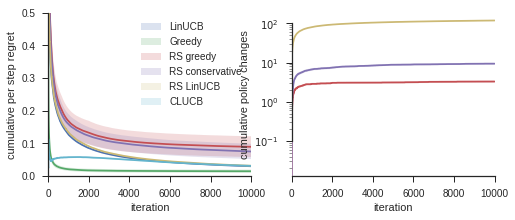

In [35]:
make_plots(d = 2, k = 4, save = True)

## In 2D, k = 2

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encounte

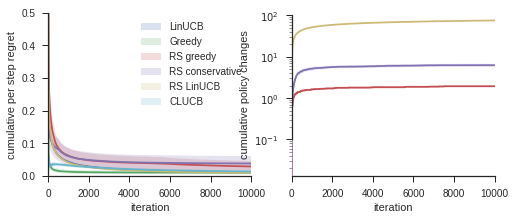

In [36]:
make_plots(d = 2, k = 2, save = True)

## In 5D, k = 4

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encounte

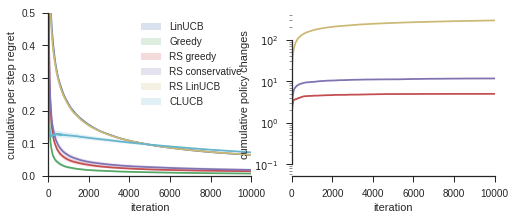

In [37]:
make_plots(d = 5, k = 4, save = True)

## In 5D, k = 2

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encounte

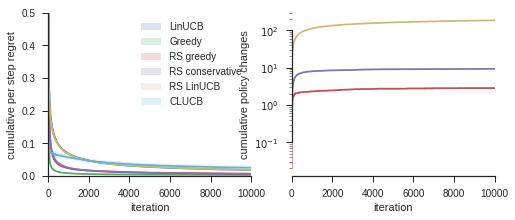

In [38]:
make_plots(d = 5, k = 2, save = True)

## In 10D, k = 2

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encounte

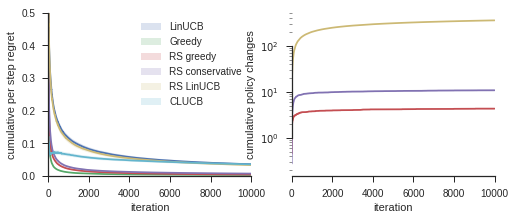

In [39]:
make_plots(d = 10, k = 2, save = True)

## In 10D, k = 4

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encounte

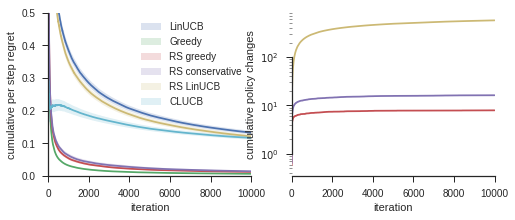

In [40]:
make_plots(d = 10, k = 4, save = True)

## In 20D, k = 2

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encounte

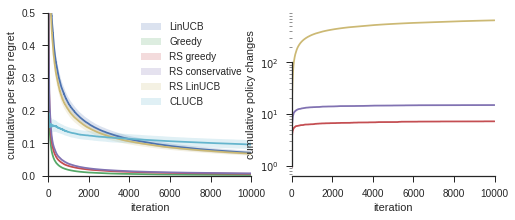

In [41]:
make_plots(d = 20, k = 2, save = True)

## In 20D, k = 4

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encounte

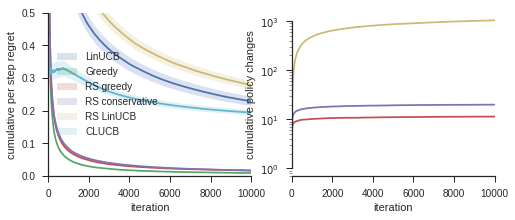

In [42]:
make_plots(d = 20, k = 4, save = True)